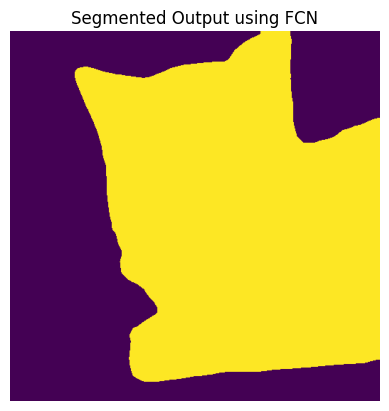

In [4]:
import torch
import torchvision
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load pre-trained FCN model
model = torchvision.models.segmentation.fcn_resnet50(pretrained=True).eval()

# Load and preprocess image
img = Image.open(r"C:\Users\user\OneDrive\Documents\LLM-from-scratch\SRET\image.png").convert("RGB")
preprocess = transforms.Compose([
    transforms.Resize((520, 520)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
input_tensor = preprocess(img).unsqueeze(0)

# Perform segmentation
with torch.no_grad():
    output = model(input_tensor)['out'][0]
    output_predictions = output.argmax(0)

# Display result
plt.imshow(output_predictions.cpu().numpy())
plt.title("Segmented Output using FCN")
plt.axis('off')
plt.show()
